<a href="https://colab.research.google.com/github/3RFUNn/Computational-Game-Design/blob/main/ProfilingLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Erfan Rafieioskouei - 240842587

## ECS7017P Lab 2

**Complete the exercises in this notebook and submit it as part of Coursework 1.**

# Player Profiling in Dota 2

In this week’s lab you will use this [Jupyter Notebook](https://docs.jupyter.org/en/latest/) to create a set of **player profiles** for the popular MOBA game *Dota 2*. Profiles separate players into groups who are similar in some way. The notebook guides you through this process. However, you will need to make your own decisions and interpret the results as part of the analysis. You are also free to e.g. remove players or adjust features if it helps the profiling, and to add extra visualisations if it helps you understand the data.

A notebook is a series of editable cells, containing either Python code (Code cells) or formatted text (Markdown cells). This notebook was written for [Google Colab](https://colab.research.google.com/) - but it could be run on another cloud service (like [Binder](https://mybinder.org/)) or [locally](https://jupyter.org/install).

### Exercises

The exercises in this lab are assessed, as part of the first coursework in this module. There are 25 marks available.
* Exercise 1: examine correlations between the original features. (2 points)
* Exercise 2: derive some new features to describe players. (3 points)
* Exercise 3: extract new features and reduce the dimensionality of the dataset using PCA. (6 points)
* Exercise 4: use K-Means to look for clusters in the reduced space, and interpret the results as player
profiles. (6 points)
* Exercise 5: consider the cluster tendancy of the dataset. (2 points)
* Exercise 6: apply AHC to the same dataset. (6 points)

### Submitting Your Work

Save/download a copy of this notebook and include that **ipynb file** in your ZIP file submission for Coursework 1.
That file should include all your lab work, i.e. any code/text you've added, and any results and images you generated.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dota 2

In Dota 2, two teams (*Radient* and *Dire*) of five players compete in a match. Each player controls a different *hero*, and fight opposing heroes in player versus player (PvP) combat on a large battlefield. The goal is to destroy the opponent team's *base* and defend yours from the other team. Both teams have weaker NPC members (*creeps*) and defensive buildings which their opponents will try to destroy, e.g. *barracks* (called *rax*) and *towers*. The map also contains neutral NPCs and buildings.

<img src="https://cdn.fastly.steamstatic.com/steam/apps/570/header.jpg" style="margin-left:auto; margin-right:auto"/>

**Experience points (XP)** are gained by killing enemy units, or being nearby as enemy units get killed (an *assist*). It is used to increase a hero's level, increasing their attributes and unlocking new abilities.

**Gold** is earned in various ways, including hero kills/assists, destroying buildings, and *last hitting* enemy creeps (landing the final blow). It is passively gained periodically throughout the game. Gold is used to purchase items, and to bypass the respawn cooldown after death (*buyback*). Players may *deny* opponents gold by killing their own team's creeps.

# The Dataset

The dataset we will be using provides in-game metrics for 865 players. Each player has a unique ID (`PlayerID`) and the following features:

* `GamesPlayed`: number of games the player has played.
* `GamesWon`: number they have won.
* `Ditches`: how many times the player was thrown out of a game.
* `GamesLeft`: how many times they voluntarily left a game early.
* `Points`: experience points gained.
* `Kills`: enemy heroes the player killed.
* `KillsPerMin`: the player’s mean kills per minute played.
* `Deaths`: number of time the player died.
* `Assist`: player is near or damages an enemy hero who’s killed.
* `CreepsKilled`: enemy creep kills.
* `CreepsDenied`: own team's creeps killed.
* `NeutralsKilled`: neutral NPCs killed.
* `TowersDestroyed`: tower buildings destroyed.
* `RaxsDestroyed`: barracks buildings destroyed.
* `TotalTime`: total playtime logged for this player.

# Getting Started

Download the Dota dataset from QMPlus and import it into a Pandas dataframe.

In [3]:
dota = pd.read_csv("DoTalicious_lab4.csv")
dota.describe()

,PlayerID,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,8.650000e+02
mean,498.176879,88.804624,48.404624,1.604624,0.710983,1014.493444,582.090173,0.131584,526.076301,913.386127,7215.310983,628.055491,1210.575723,67.865896,28.458960,2.236415e+05
std,290.079271,177.433666,100.183653,2.968348,1.810382,119.292057,1281.943028,0.065558,1067.717544,1921.554543,15454.723206,1401.315243,2613.056959,153.569348,64.468938,4.550672e+05
min,0.000000,1.000000,0.000000,0.000000,0.000000,626.837000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.349000e+03
25%,243.000000,3.000000,1.000000,0.000000,0.000000,962.285000,11.000000,0.090000,17.000000,18.000000,160.000000,12.000000,16.000000,1.000000,0.000000,6.240000e+03
50%,500.000000,15.000000,7.000000,0.000000,0.000000,996.646000,74.000000,0.130000,92.000000,123.000000,975.000000,76.000000,145.000000,7.000000,3.000000,3.498000e+04
75%,751.000000,89.000000,47.000000,2.000000,1.000000,1046.430000,511.000000,0.170000,554.000000,862.000000,6621.000000,540.000000,1105.000000,61.000000,26.000000,2.206800e+05
max,1000.000000,1631.000000,852.000000,20.000000,18.000000,2010.240000,11457.000000,0.420000,11220.000000,20133.000000,142043.000000,13030.000000,21770.000000,1501.000000,662.000000,4.294920e+06


PlayerID is a **nominal** variable: these numbers are just names for individual players. The rest of the features are numeric, and will be the basis for our player profiles.

In [4]:
numData = dota.drop(columns='PlayerID') # Ignore player IDs
numFeatures = list(numData.columns.values) # Make a list of numeric features
numFeatures # Show the list

['GamesPlayed',
 'GamesWon',
 'GamesLeft',
 'Ditches',
 'Points',
 'Kills',
 'KillsPerMin',
 'Deaths',
 'Assists',
 'CreepsKilled',
 'CreepsDenied',
 'NeutralsKilled',
 'TowersDestroyed',
 'RaxsDestroyed',
 'TotalTime']

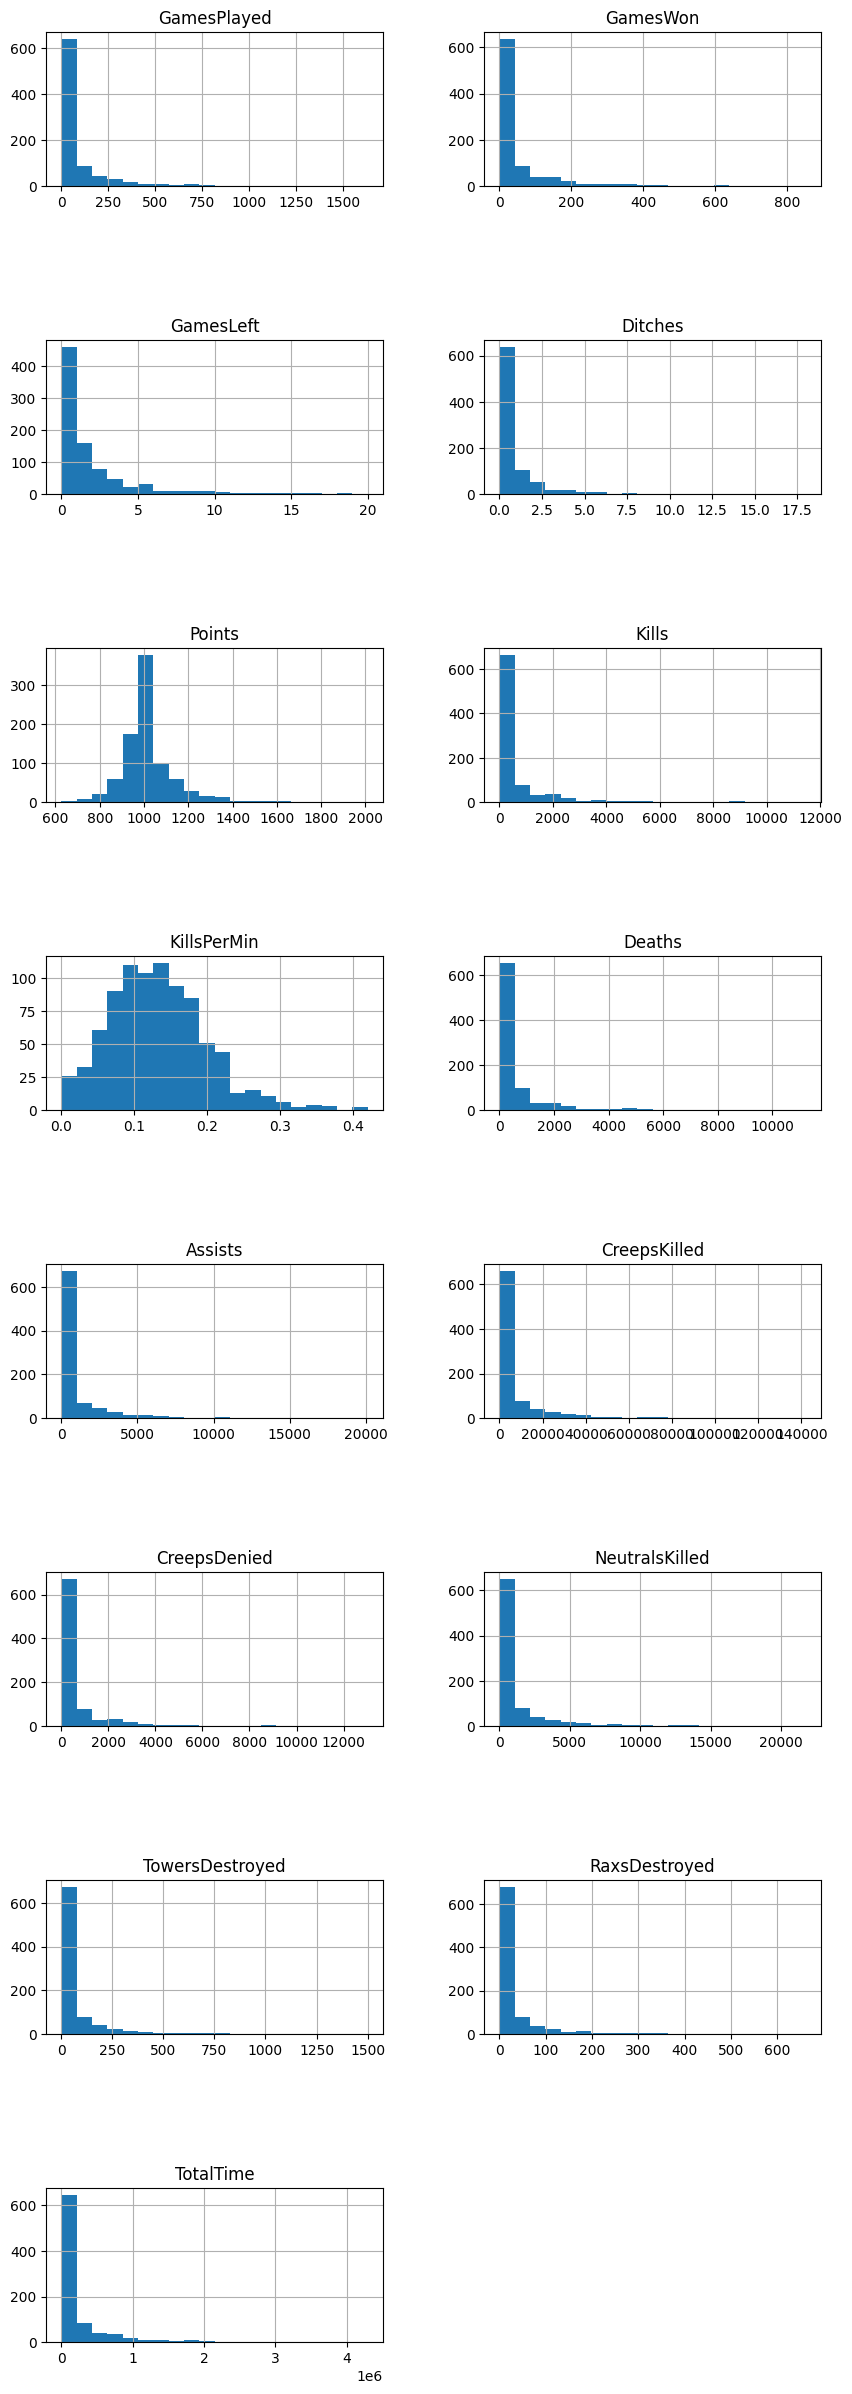

In [5]:
dota[numFeatures].hist(bins=20,figsize=(10,30),layout=(8,2))
plt.subplots_adjust(hspace=1)

# Correlations

Let's see how these features are [correlated](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/types-of-correlation.html).

In [6]:
# Calculate correlation between each pair of features
correlationMatrix = dota[numFeatures].corr()
# Display correlation matrix
correlationMatrix.style.background_gradient(cmap='Reds')

,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime
GamesPlayed,1.000000,0.989658,0.633490,0.679918,0.434558,0.952204,0.190443,0.980631,0.991066,0.959716,0.904993,0.944863,0.930926,0.930916,0.999241
GamesWon,0.989658,1.000000,0.631384,0.681182,0.468891,0.975076,0.226965,0.958905,0.988830,0.971850,0.917226,0.936764,0.960305,0.956673,0.986024
GamesLeft,0.633490,0.631384,1.000000,0.557216,0.296151,0.626822,0.231077,0.609055,0.610410,0.618798,0.554171,0.627144,0.611481,0.604425,0.619411
Ditches,0.679918,0.681182,0.557216,1.000000,0.317797,0.651283,0.136975,0.665785,0.670019,0.662770,0.599348,0.672967,0.654895,0.648418,0.673847
Points,0.434558,0.468891,0.296151,0.317797,1.000000,0.477475,0.310594,0.387313,0.446376,0.468354,0.486806,0.393867,0.482782,0.503423,0.433173
Kills,0.952204,0.975076,0.626822,0.651283,0.477475,1.000000,0.278602,0.910421,0.946558,0.983112,0.901193,0.920005,0.984009,0.977834,0.947791
KillsPerMin,0.190443,0.226965,0.231077,0.136975,0.310594,0.278602,1.000000,0.157980,0.191407,0.251990,0.222877,0.208185,0.277149,0.266562,0.183508
Deaths,0.980631,0.958905,0.609055,0.665785,0.387313,0.910421,0.157980,1.000000,0.971094,0.916023,0.852396,0.914816,0.882338,0.874639,0.981946
Assists,0.991066,0.988830,0.610410,0.670019,0.446376,0.946558,0.191407,0.971094,1.000000,0.940424,0.896406,0.919154,0.919779,0.918964,0.989685
CreepsKilled,0.959716,0.971850,0.618798,0.662770,0.468354,0.983112,0.251990,0.916023,0.940424,1.000000,0.925156,0.943714,0.980792,0.975325,0.957503


It seems many of the features are strongly correlated with how many games/playtime was logged. This makes sense: for example, the number of games you win (`GamesWon`) is going to be higher the more games you play (`GamesPlayed`).

---
# Exercise 1

Which feature(s) are not strongly correlated with GamesPlayed? Why do you think this is?


# Analysis of Correlation with GamesPlayed

Based on the provided correlation matrix, There are 3 features which have the less correlation.

1. **Ditches**:<br>
   From the numbers we can guss that ditches might be more dependent on player strategy and game situation rather than the total number of games played.

2. **Points**:<br>
   Points could be influenced by various factors such as individual performance in each game, team dynamics, and specific game objectives, which do not directly relate with the number of games played.

3. **KillsPerMin**:<br>
   The very weak positive relationship which is (KillsPerMin) measures the rate of kills per minute, this shows us how skilled the player is rather than it's gameplay time. This depends more on player skill, game phase, and team play. <br><br>



In summary, these features are not strongly correlated with `GamesPlayed` because they depend more on the game phase related stuff rather than the number of games played.



---

# Feature Engineering


In order to profile players using these in-game metrics, we should focus on how players perform in an *average* game. We want to engineer some new metrics which are independant of how many matches were logged for particular player (`GamesPlayed`), or how much of their playtime was logged overall (`TotalTime`).

For example, we can define a new feature from `WinRate` which measures a player’s wins per game.

array([[<Axes: title={'center': 'WinRate'}>, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

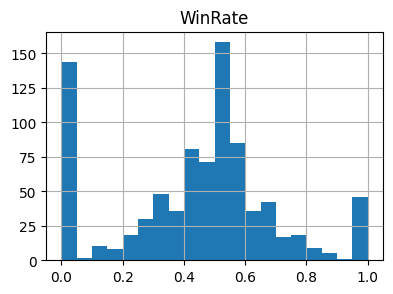

In [7]:
dota['WinRate'] = dota['GamesWon'] / dota['GamesPlayed']

dota[['WinRate']].hist(bins=20,figsize=(10,30),layout=(8,2))

---
# Exercise 2

Following the example of `WinRate`, consider which existing features should be made independent of games played or total playtime. Define these new features. Briefly explain your choice. Plot the distributions for the new features.

Our player profiling will use the new features, and any original features that were already time-independent.

Define list `myFeatures` to include ALL the features you intend to use for player profiling.

In [8]:
# Add your code
myFeatures = ['WinRate']

# Define new features
dota['DitchRate'] = dota['Ditches'] / dota['GamesPlayed']
dota['LeaveRate'] = dota['GamesLeft'] / dota['GamesPlayed']
dota['PointsPerGame'] = dota['Points'] / dota['GamesPlayed']
dota['KillsPerGame'] = dota['Kills'] / dota['GamesPlayed']
dota['DeathsPerGame'] = dota['Deaths'] / dota['GamesPlayed']

Explanation of Choice:
<br>
These new features are created by dividing the original features (Ditches, Kills, Deaths) by the number of games played (GamesPlayed). This normalization makes sure that the player's performance is indepenedent from the games played. This approach allows for a fairer comparison between players who have played different numbers of games.
<br>
For example, KillsPerGame represents the average number of kills a player gets per game. By considering these per-game metrics, we can focus on the player's inherent tendencies and strategies rather than their overall experience or playtime.
<br><br>
myFeatures:

The myFeatures list includes all the new features we've engineered, plus the original WinRate feature.

---

# Scaling Features

Before we work with the data, we need to scale our selected features.

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale our features
dota[myFeatures] = scaler.fit_transform(dota[myFeatures])

# Feature Extraction with PCA

We will now try to **extract** some new features from the data using PCA. Define the variable `nPC` as the
maximum number of principal components to compute. Then apply PCA to the data.

In [41]:
from sklearn.decomposition import PCA
nPC = 6 # Choose a suitable value here
pca = PCA(n_components=nPC).fit(dota[myFeatures]) # Compute PCA
dota_pca = pca.transform(dota[myFeatures]) # Project the player data in the new space

Let's look at the player data plotted against the first two principal components.

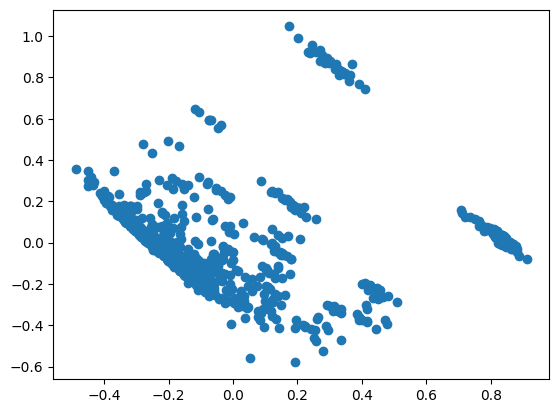

In [42]:
plt.scatter(dota_pca[:,0],dota_pca[:,1])

Examine the proportion of the total variance explained by each of the principal components.

In [43]:
pca.explained_variance_

array([0.11331062, 0.05916674, 0.02718379, 0.01624717, 0.00975142,
       0.00356377])

Now plot these values for each principal component (PC1, PC2, PC3, ... etc.):

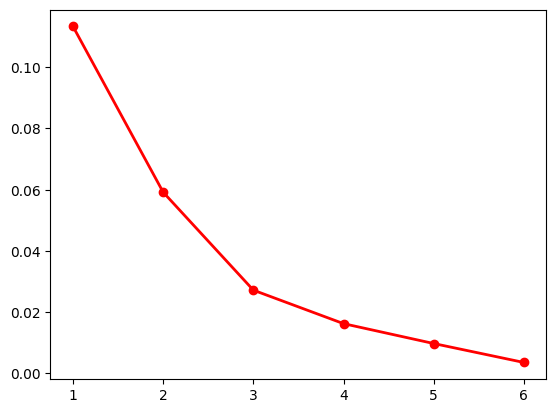

In [44]:
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_, 'ro-', linewidth=2)

Finally, we examine the loadings of your features on the principal components, i.e. the weights used to calculate
each principal component as a linear combination of input features.

In [45]:
pcLabels = ["PC"+str(i) for i in range(1,nPC + 1)]
loadings = pd.DataFrame(pca.components_.T, columns=pcLabels, index=myFeatures)
loadings.style.background_gradient(cmap='bwr',vmin=-1,vmax=1)

,PC1,PC2,PC3,PC4,PC5,PC6
WinRate,-0.511609,0.779987,0.107134,-0.288389,0.187651,0.004220
DitchRate,0.005432,-0.017175,0.030669,-0.016497,0.020872,0.999013
LeaveRate,0.018483,-0.191589,0.837502,0.086617,0.502577,-0.038175
PointsPerGame,0.833778,0.543354,0.081652,0.042444,0.033263,0.002307
KillsPerGame,-0.172456,0.204502,-0.164073,0.928094,0.199330,0.020652
DeathsPerGame,0.113835,-0.132530,-0.502579,-0.214235,0.819103,-0.008120


---
# Exercise 3

The next step is to drop the less important principal components, retaining those which tell us most about how players vary in their behaviour. Which principal components should we keep, and why? Is there more than one alternative?

Provide an interpretation for each of the components you intend to keep, i.e. how each one describes players.

To determine which principal components (PCs) to retain, from the scree plot it is clear that PC1 and PC2 explain the majority of the variance, with diminishing returns for subsequent PCs. <br><br>
For the next step of which PC's to keep we could check out the
Interpretation of Loadings. <br><br>
 PC1 seems to represent a player's overall performance in terms of points scored per game. Players with higher values on PC1 tend to score more points but may have lower win rates, suggesting they might be aggressive players who take risks to score points.<br>
 PC2 appears to represent a player's consistency and reliability. Players with higher values on PC2 tend to have higher win rates and moderate points per game, indicating they are consistent performers who stay in the game longer.<br><br>
 Based on the explained variance and interpretability, I decided to keep **PC1 and PC2** . These two components together explain a great deal of the variance and provide meaningful insights into player behavior.

---
Define a list `pcs` of the principal components you are keeping. Add each of these as a new column in the dataframe. This is a new lower dimension feature space you can use to analyse player behaviour.

For example, if you only wanted to keep the first two principal components (i.e. reducing the data to two dimensions):

In [46]:
# Edit this with your choice of PCs
pcs = ['PC1','PC2']
dota['PC1'] = dota_pca[:,0]
dota['PC2'] = dota_pca[:,1]

---

# Clustering Players with K-Means

The next stage is to try to cluster players in your lower dimension feature space using K-Means. We will have to decide on the number of clusters `K`.

Let’s define a function `kmeans_eval` to evaluate K-Means clusterings using both WSS and silhouette scores.

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 10) # Range of K values to examine

# Compute and evaluate K-means clusters for all k_values
def kmeans_eval(some_data):
    wss = []
    silhouettes = []
    for k in k_values:
        model = KMeans(n_clusters=k)
        model.fit(some_data)
        km_labels = model.predict(some_data)
        wss.append(model.inertia_)
        silhouettes.append(silhouette_score(some_data, km_labels))
    return wss, silhouettes

# Apply this to our data
wss, silhouettes = kmeans_eval(dota[pcs])

Plot the WSS for each value of K.

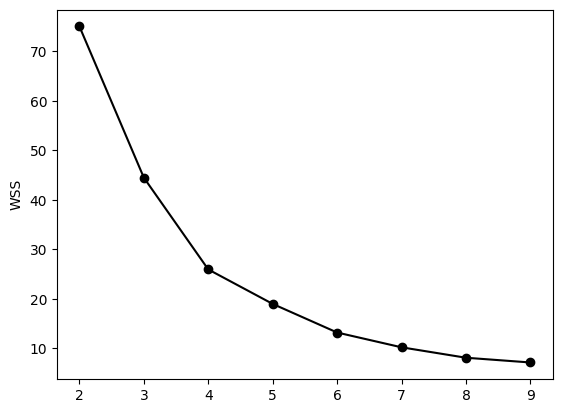

In [48]:
# Plot WSS for each K
plt.plot(k_values, wss, '-o', color='black')
plt.ylabel('WSS')
plt.show()

Repeat this plot for the silhouette widths. Use these plots to decide on a good choice for K. Define this with a variable
`goodK`.

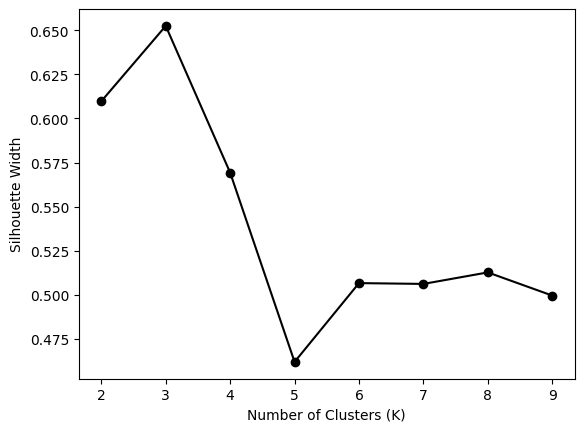

In [49]:
# Plot the silhouette widths for each K
plt.plot(k_values, silhouettes, '-o', color='black')
plt.ylabel('Silhouette Width')
plt.xlabel('Number of Clusters (K)')
plt.show()


In [51]:
# Based on these plots the best K is 3.

goodK = 3

Rerun K-Means with your chosen number of clusters and visualise the results using the first two principal components. You may want to add plots for other PCs.

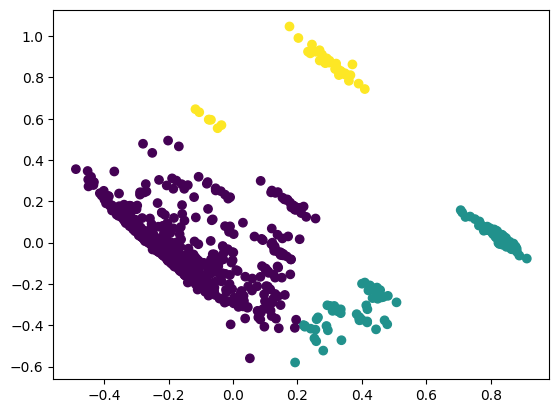

In [52]:
km = KMeans(n_clusters=goodK)
km.fit(dota[pcs])
dota['Cluster1'] = km.predict(dota[pcs])
plt.scatter(dota['PC1'],dota['PC2'],c=dota['Cluster1'])

---
# Exercise 4

Why did you chose this value for K? Interpret the clusters as a set of player profiles. Provide an appropriate **name** and **description** of player behaviour for each profile.

**Choice of K**<br><br>
I chose K = 3 based on the following observations from the WSS and Silhouette plots:

**Elbow Method (WSS Plot):** The WSS plot shows a significant decrease in inertia (within-cluster sum of squares) as K increases from 2 to 3. After K = 3, the decrease in WSS becomes less effective, suggesting that adding more clusters might not significantly improve the clustering quality.<br><br>
**Silhouette Score:** The Silhouette plot shows a relatively high Silhouette score for K = 3, indicating that the clusters are well-separated and the data points within each cluster are relatively close to each other.
<br><br>
Based on the combination of the Elbow Method and the Silhouette score, K = 3 seems to be a reasonable choice for the number of clusters.
<br><br>

**Player Profiles:**<br>
Based on the clusters obtained I used AI to interpret the Cluster as the following player profiles: <br><br>

**Cluster 0: "The Strategists"**<br>

These players exhibit a balance between winning and scoring points. They likely focus on strategic gameplay, prioritizing objectives and teamwork over individual performance. They may not have the highest kill rates, but they contribute significantly to team victories.
<br><br>
**Cluster 1: "The Aggressors"**

These players are aggressive and prioritize kills and points, even if it means taking risks and potentially losing games. They are likely skilled players who enjoy dominating their opponents but may sometimes prioritize individual glory over team success.
<br><br>
**Cluster 2: "The Casuals"**

These players may be newer or less experienced players who are still learning the game. They may not have a clear strategy and might be more prone to leaving games early.


---
# Exercise 5

Do you think the player data has high cluster tendancy? **Justify** your answer using `pyclustertend` package. ([Documentation](https://pyclustertend.readthedocs.io/en/latest/).

In [64]:
!pip install pyclustertend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.44.0
    Uninstalling llvmlite-0.44.0:
      Successfully uninstalled llvmlite-0.44.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: numba
    Found existing installation: numba 0.61.0
    Uninstalling numba-0.61.0:
      Successfully uninstalled numba-0.61.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, b

In [65]:
# Your code
from pyclustertend import vat
import matplotlib.pyplot as plt


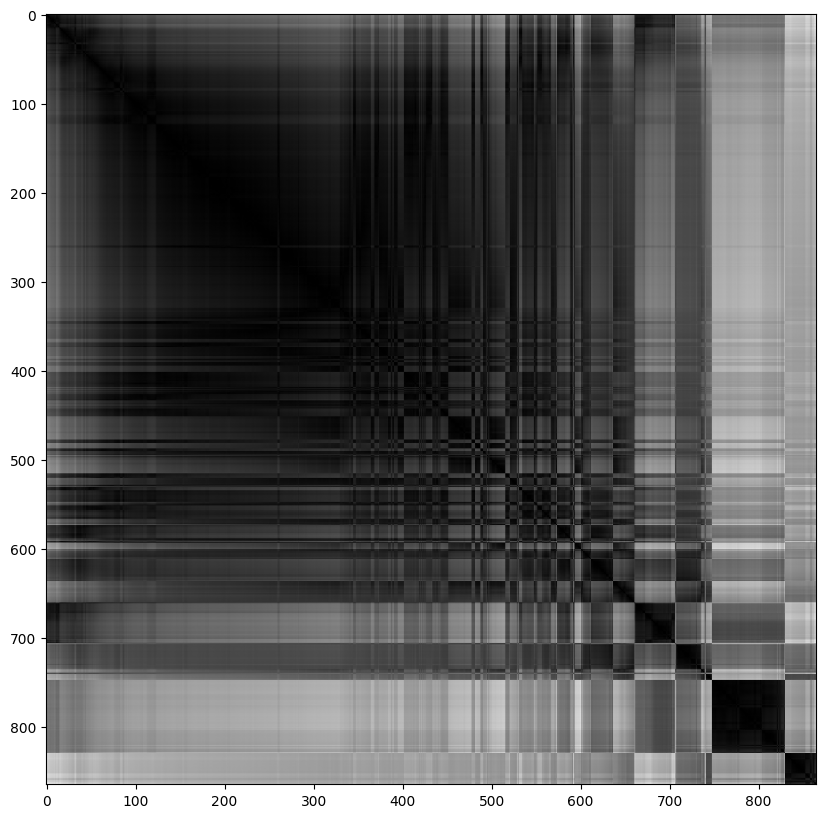

In [66]:
vat(dota[pcs])
plt.show()

---
# Exercise 6

Read the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) for
Agglomerative Hierarchical Clustering (AHC) and [their example code](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html).

Apply AHC to the Dota dataset and visualise the results as a dendrogram. Provide an interpretation of the results in terms of player behaviour.

In [ ]:
# Your code


Your answer: ...

# Submission Reminder

Your Coursework 1 ZIP file submission should include a modified copy of this notebook (a .ipynb file) documenting your lab work.